In [49]:
import pandas as pd
import numpy as np
import os
import math
import random
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
from tqdm.notebook import tqdm
from KDEpy import FFTKDE
from functools import reduce  
import plotly.express as px

In [2]:
def kl_divergence(p, q):
    if len(p)>len(q):
        p = p[0:len(q)]
    elif len(q)>len(p):
        q = q[0:len(p)]
    return np.sum(np.where(p != 0, p * np.log(p / q), 0))

In [147]:
data_dir_desktop = 'C:/Research Activities/Dataset/BB-MAS_Dataset/Desktop_samples/'
data_dir_mobile = 'C:/Research Activities/Dataset/BB-MAS_Dataset/Smartphone_samples/'
data_dir_tablet = 'C:/Research Activities/Dataset/BB-MAS_Dataset/Tablet_samples/'
user_files_d = os.listdir(data_dir_desktop)
user_files_mobile = os.listdir(data_dir_mobile)
user_files_tablet = os.listdir(data_dir_tablet)

df_desktop  = pd.DataFrame()
df_mobile  = pd.DataFrame()
df_tablet  = pd.DataFrame()

for i in tqdm(range(len(user_files_d))):
        user_file_d = user_files_d[i]
        curr_user_ind = int(user_file_d[user_file_d.find('_')+1:user_file_d.find('.')])
        data_frame = pd.read_csv(data_dir_desktop+user_file_d, header=0)
        data_frame['F1'] = data_frame['F1']/999
        data_frame['F2'] = data_frame['F2']/999
        data_frame['F3'] = data_frame['F3']/999
        data_frame['F4'] = data_frame['F4']/999
        data_frame_dis_1 = data_frame[(data_frame['Distance']==1) & (data_frame['Hands']!= 'LR')]  
        
        data11 = np.sort(np.array(data_frame_dis_1['F1']))[:, np.newaxis]
        x11, y11 = FFTKDE(kernel='gaussian', bw=0.01).fit(data11).evaluate()
        data12 = np.sort(np.array(data_frame_dis_1['F2']))[:, np.newaxis]
        x12, y12 = FFTKDE(kernel='gaussian', bw=0.01).fit(data12).evaluate()
        data13 = np.sort(np.array(data_frame_dis_1['F3']))[:, np.newaxis]
        x13, y13 = FFTKDE(kernel='gaussian', bw=0.01).fit(data13).evaluate()
        data14 = np.sort(np.array(data_frame_dis_1['F4']))[:, np.newaxis]
        x14, y14 = FFTKDE(kernel='gaussian', bw=0.02).fit(data14).evaluate() 
        
        df_d = pd.DataFrame([[curr_user_ind,y11,y12,y13,y14]],columns=['User', 'Desktop_F1','Desktop_F2','Desktop_F3','Desktop_F4'])
        df_desktop = df_desktop.append(df_d, ignore_index=True)   
        
for i in tqdm(range(len(user_files_mobile))):
        user_file_mobile = user_files_mobile[i]
        curr_user_ind_mobile = int(user_file_mobile[user_file_mobile.find('_')+1:user_file_mobile.find('.')])
        data_frame_m = pd.read_csv(data_dir_mobile+user_file_mobile, header=0)  
        data_frame_m['F1'] = data_frame_m['F1']/999
        data_frame_m['F2'] = data_frame_m['F2']/997
        data_frame_m['F3'] = data_frame_m['F3']/996
        data_frame_m['F4'] = data_frame_m['F4']/999
        data_frame_dis_1_m = data_frame_m[(data_frame_m['Distance']==1) & (data_frame_m['Hands']!= 'LR')]
        
        data11_m = np.sort(np.array(data_frame_dis_1_m['F1']))[:, np.newaxis]
        x11_m, y11_m = FFTKDE(kernel='gaussian', bw=0.02).fit(data11_m).evaluate()
        data12_m = np.sort(np.array(data_frame_dis_1_m['F2']))[:, np.newaxis]
        x12_m, y12_m = FFTKDE(kernel='gaussian', bw=0.01).fit(data12_m).evaluate()
        data13_m = np.sort(np.array(data_frame_dis_1_m['F3']))[:, np.newaxis]
        x13_m, y13_m = FFTKDE(kernel='gaussian', bw=0.02).fit(data13_m).evaluate()
        data14_m = np.sort(np.array(data_frame_dis_1_m['F4']))[:, np.newaxis]
        x14_m, y14_m = FFTKDE(kernel='gaussian', bw=0.01).fit(data14_m).evaluate()
        df_m = pd.DataFrame([[curr_user_ind_mobile, y11_m,y12_m,y13_m,y14_m]],columns=['User','Mobile_F1','Mobile_F2','Mobile_F3,','Mobile_F4'])
        df_mobile = df_mobile.append(df_m, ignore_index=True)
        
for i in tqdm(range(len(user_files_tablet))):
        user_file_tablet = user_files_tablet[i]
        curr_user_ind_tablet = int(user_file_tablet[user_file_tablet.find('_')+1:user_file_tablet.find('.')])
        data_frame_t = pd.read_csv(data_dir_tablet+user_file_tablet, header=0)
        data_frame_t['F1'] = data_frame_t['F1']/999
        data_frame_t['F2'] = data_frame_t['F2']/999
        data_frame_t['F3'] = data_frame_t['F3']/997
        data_frame_t['F4'] = data_frame_t['F4']/999  
        data_frame_t_dis_1 = data_frame_t[(data_frame_t['Distance']==1) & (data_frame_t['Hands']!= 'LR')]
     
        data11_t = np.sort(np.array(data_frame_t_dis_1['F1']))[:, np.newaxis]
        x11_t, y11_t = FFTKDE(kernel='gaussian', bw=0.01).fit(data11_t).evaluate()
        data12_t = np.sort(np.array(data_frame_t_dis_1['F2']))[:, np.newaxis]
        x12_t, y12_t = FFTKDE(kernel='gaussian', bw=0.01).fit(data12_t).evaluate()
        data13_t = np.sort(np.array(data_frame_t_dis_1['F3']))[:, np.newaxis]
        x13_t, y13_t = FFTKDE(kernel='gaussian', bw=0.02).fit(data13_t).evaluate()
        data14_t = np.sort(np.array(data_frame_t_dis_1['F4']))[:, np.newaxis]
        x14_t, y14_t = FFTKDE(kernel='gaussian', bw=0.01).fit(data14_t).evaluate()
        df_t = pd.DataFrame([[curr_user_ind_tablet, y11_t,y12_t,y13_t,y14_t]], columns=['User','Tablet_F1','Tablet_F2','Tablet_F3','Tablet_F4'])
        df_tablet = df_tablet.append(df_t, ignore_index=True)
        
df_final =reduce(lambda left, right:
                                    pd.merge(left , right,
                              on = ["User"],
                              how = "inner"),
                     [df_desktop, df_mobile, df_tablet])

  0%|          | 0/116 [00:00<?, ?it/s]

  0%|          | 0/116 [00:00<?, ?it/s]

  0%|          | 0/117 [00:00<?, ?it/s]

In [148]:
df_final

,User,Desktop_F1,Desktop_F2,Desktop_F3,Desktop_F4,Mobile_F1,Mobile_F2,"Mobile_F3,",Mobile_F4,Tablet_F1,Tablet_F2,Tablet_F3,Tablet_F4
0,1,"[1.0684934945171973e-08, 4.197327688872301e-07...","[1.1399143909458136e-07, 2.1624346201200372e-0...","[7.316202228015361e-08, 2.063901313695001e-07,...","[7.45182156051706e-08, 2.08239050834828e-07, 2...","[4.572989686067428e-07, 1.288399508755742e-06,...","[9.315544964388218e-08, 1.9549277912384567e-07...","[7.621701212332984e-08, 1.853263980047593e-07,...","[3.532749514297949e-08, 1.8663198435077127e-07...","[8.86054160054489e-08, 2.920770962919015e-07, ...","[4.3227959842136645e-08, 2.0096191451364613e-0...","[8.386104351856921e-08, 2.849854503347038e-07,...","[5.022798010722304e-08, 1.9713519087040595e-07..."
1,10,"[1.8030227790700102e-07, 1.2744592141542124e-0...","[1.0879974979939749e-07, 2.0639474989087654e-0...","[1.1733165066742789e-07, 2.090177239311393e-07...","[7.188737655379013e-08, 1.95378761154345e-07, ...","[6.060428528129327e-07, 1.5334641931342607e-06...","[1.1849626712666644e-07, 2.1434818243731195e-0...","[1.1953681874287118e-07, 2.0893178455111706e-0...","[5.1763494488883347e-08, 2.2170534358397436e-0...","[1.1333360310754911e-07, 2.0105005735319745e-0...","[6.7137084169872e-08, 2.0001090301201743e-07, ...","[1.5021978670903055e-07, 3.461004377382067e-07...","[6.68710397333212e-08, 1.9287958979188322e-07,..."
2,100,"[7.673556992784344e-08, 2.2877484243816987e-07...","[1.1305323795159754e-07, 2.1446368043348553e-0...","[7.92175520229447e-08, 7.747107014687324e-07, ...","[1.1132394405498822e-07, 3.37941820665607e-07,...","[2.094156466872879e-06, 4.370058674371634e-06,...","[6.474199897576078e-08, 2.0326724146433503e-07...","[1.3343163940017718e-07, 5.988933902511262e-07...","[7.938088718129633e-08, 2.14595517064818e-07, ...","[3.151173511022945e-07, 1.6214502402241677e-06...","[7.90799789285635e-08, 2.0323192369677064e-07,...","[3.410753904411462e-07, 8.195824598658665e-07,...","[7.941551625657661e-08, 2.0826602524676725e-07..."
3,101,"[2.460967669207455e-07, 1.7036437278659093e-06...","[1.4306917762250762e-07, 2.4721189878175853e-0...","[1.1628164873479993e-07, 2.5529895430660637e-0...","[9.374153335621401e-08, 2.3551862898921935e-07...","[6.442141553431318e-07, 1.326165915125976e-06,...","[1.344387923935374e-07, 2.405746037125574e-07,...","[2.896330140631401e-08, 2.2620220317842566e-07...","[1.2299630145804138e-07, 2.483394759659069e-07...","[2.0026707497419597e-07, 5.684148786327505e-07...","[1.164343706681895e-08, 2.314854540596363e-07,...","[1.6334330690377167e-07, 2.644617531016677e-07...","[1.1119619087590966e-07, 2.3229959725417188e-0..."
4,102,"[3.388459807874435e-08, 2.2107619945779901e-07...","[3.0733865277463774e-09, 2.18874198820773e-07,...","[6.30186233696796e-08, 3.709349356687251e-07, ...","[1.6319188523638133e-07, 4.0096167210324007e-0...","[1.118617171831936e-06, 3.928794603261662e-06,...","[3.0751217608213644e-08, 2.6810939464155303e-0...","[1.3100478531664446e-07, 4.017933307228329e-07...","[1.2810409526405227e-07, 2.6920406790899196e-0...","[2.9504930843099584e-07, 2.619284144791104e-06...","[6.099218406471506e-08, 1.976688461201193e-07,...","[1.3664385189282633e-07, 1.2428706089567081e-0...","[1.1034647240986196e-07, 1.8212224657798502e-0..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...
110,95,"[3.3054342046120665e-07, 8.606314970233699e-07...","[7.409819262067053e-08, 2.717730776951886e-07,...","[6.654226385069229e-08, 2.0746764667891234e-07...","[7.884228424421241e-08, 1.898962016592887e-07,...","[4.192154557829922e-08, 2.5742254669237136e-07...","[1.4815507627117085e-07, 2.729300260470063e-07...","[5.110329353786457e-08, 2.5608278630723473e-07...","[7.887527389206461e-08, 2.7319126214148896e-07...","[1.1406942582731967e-08, 6.792270783798865e-07...","[4.343196608692152e-08, 2.308982359112412e-07,...","[6.177457702119738e-08, 3.0459745453277127e-07...","[7.834766172838544e-08, 2.335810366023742e-07,..."
111,96,"[1.2362472260347632e-07, 

# F1

In [149]:
User = []
D_M = []
D_T = []
M_T = []
for row_id in range(0, len(df_final)):
    U = df_final.iloc[row_id,0]
    DM = kl_divergence(df_final.iloc[row_id,1], df_final.iloc[row_id,5])
    DT = kl_divergence(df_final.iloc[row_id,1], df_final.iloc[row_id,9])
    MT = kl_divergence(df_final.iloc[row_id,5], df_final.iloc[row_id,9])
    
    User.append(U)
    D_M.append(DM)
    D_T.append(DT)
    M_T.append(MT)
    
KL_divergence_mated = pd.DataFrame(list(zip(User, D_M, D_T, M_T)),columns=['User','Desktop_Mobile','Desktop_Tablet','Mobile_Tablet'])


In [150]:
KL_divergence_mated

,User,Desktop_Mobile,Desktop_Tablet,Mobile_Tablet
0,1,2340.733155,2508.542791,0.826917
1,10,2463.742618,5572.916681,12.305694
2,100,3124.591878,11893.057000,2797.714654
3,101,2118.823386,2551.292828,-58.089128
4,102,1400.269477,1284.660494,549.737820
...,...,...,...,...
110,95,2610.033498,944.480836,738.536387
111,96,3875.502647,1904.530465,3948.371615
112,97,6219.560299,4491.062497,4757.574404
113,98,1666.838505,1701.595277,387.105673


In [177]:
KL_divergence_mated[KL_divergence_mated['Mobile_Tablet']==max(KL_divergence_mated['Mobile_Tablet'])]

,User,Desktop_Mobile,Desktop_Tablet,Mobile_Tablet
60,5,5653.512107,7419.237397,27678.901867


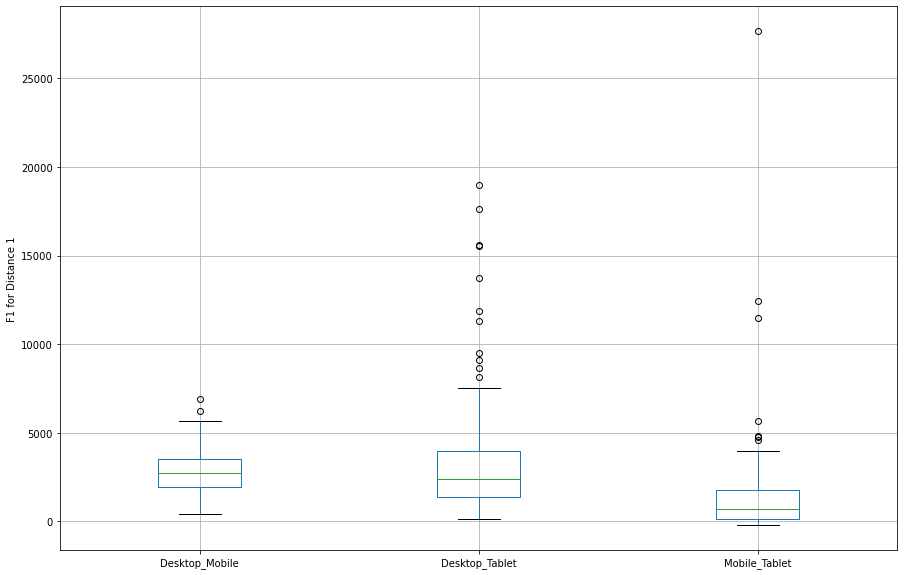

In [184]:
fig,ax = plt.subplots(figsize = (15,10))
KL_divergence_mated.boxplot(column=['Desktop_Mobile','Desktop_Tablet', 'Mobile_Tablet'])
plt.ylabel('F1 for Distance 1')
plt.show()

In [165]:
User1 = []
User2 = []
D_D = []
M_M = []
T_T = []
M_T = []
for row_id1 in range(0, len(df_final)):
    U1 = df_final.iloc[row_id1,0]
    
    for row_id2 in range (0, len(df_final)):
        U2 = df_final.iloc[row_id2,0]
        if U1 != U2:
            DD = kl_divergence(df_final.iloc[row_id,1], df_final.iloc[row_id2,1])
            MM = kl_divergence(df_final.iloc[row_id,5], df_final.iloc[row_id2,5])
            TT = kl_divergence(df_final.iloc[row_id,9], df_final.iloc[row_id2,9])
            MT = kl_divergence(df_final.iloc[row_id,5], df_final.iloc[row_id2,9])
    
            User1.append(U1)
            User2.append(U2)
            D_D.append(DD)
            M_M.append(MM)
            T_T.append(TT)
            M_T.append(MT)
    
KL_divergence_nonmated = pd.DataFrame(list(zip(User1, User2, D_D, M_M, T_T,M_T)),columns=['User1','User2','Desktop_Desktop','Mobile_Mobile','Tablet_Tablet','Mobile_Tablet'])


In [166]:
KL_divergence_nonmated

,User1,User2,Desktop_Desktop,Mobile_Mobile,Tablet_Tablet,Mobile_Tablet
0,1,10,1096.122350,1001.951940,1988.030862,1350.010918
1,1,100,1307.086144,2219.915838,2284.470352,959.947012
2,1,101,281.535718,479.097539,610.853184,412.117719
3,1,102,1413.392534,739.200986,121.629467,9.874811
4,1,103,722.540784,1830.155203,552.217545,252.122336
...,...,...,...,...,...,...
13105,99,94,2109.531247,2308.588618,504.040892,340.741646
13106,99,95,1139.634548,968.675412,75.137477,10.295173
13107,99,96,363.517721,1909.450939,1095.721606,219.042720
13108,99,97,88.141998,2910.352706,1228.403742,49.534934


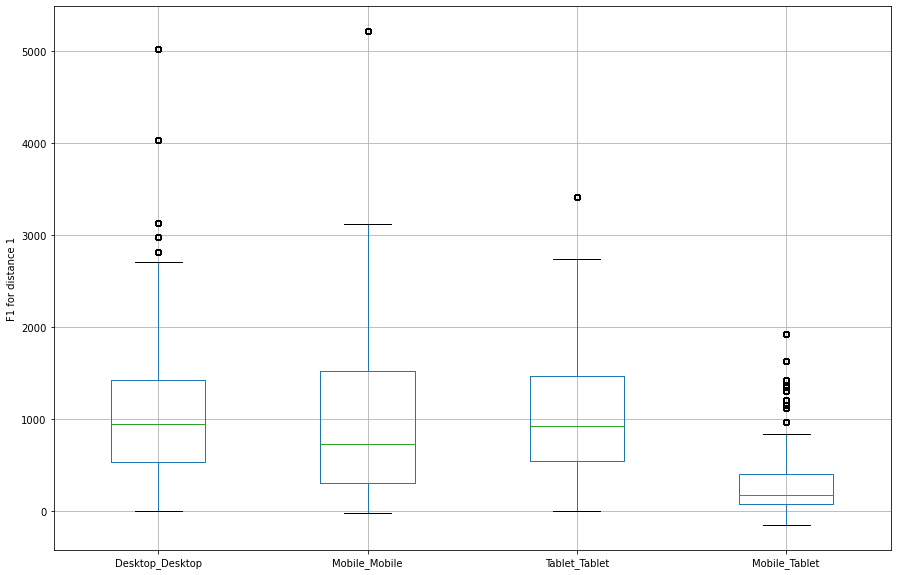

In [186]:
fig,ax = plt.subplots(figsize = (15,10))
KL_divergence_nonmated.boxplot(column=['Desktop_Desktop','Mobile_Mobile', 'Tablet_Tablet','Mobile_Tablet'])
plt.ylabel('F1 for distance 1')
plt.show()

# F2

In [151]:
User = []
D_M_f2 = []
D_T_f2 = []
M_T_f2= []
for row_id in range(0, len(df_final)):
    U = df_final.iloc[row_id,0]
    DM = kl_divergence(df_final.iloc[row_id,2], df_final.iloc[row_id,6])
    DT = kl_divergence(df_final.iloc[row_id,2], df_final.iloc[row_id,10])
    MT = kl_divergence(df_final.iloc[row_id,6], df_final.iloc[row_id,10])
    
    User.append(U)
    D_M_f2.append(DM)
    D_T_f2.append(DT)
    M_T_f2.append(MT)
    
KL_divergence_mated_f2 = pd.DataFrame(list(zip(User, D_M_f2, D_T_f2, M_T_f2)),columns=['User','Desktop_Mobile','Desktop_Tablet','Mobile_Tablet'])


In [152]:
KL_divergence_mated_f2

,User,Desktop_Mobile,Desktop_Tablet,Mobile_Tablet
0,1,789.157626,690.573572,156.591056
1,10,1824.923674,942.194976,2093.850248
2,100,901.092432,1926.938636,1113.011841
3,101,991.627262,382.399741,568.802370
4,102,506.967626,437.828033,556.652313
...,...,...,...,...
110,95,1028.110695,620.824065,176.461935
111,96,1334.636644,659.322965,752.652141
112,97,7112.946184,1618.491664,901.888694
113,98,144.033121,10.588922,155.388577


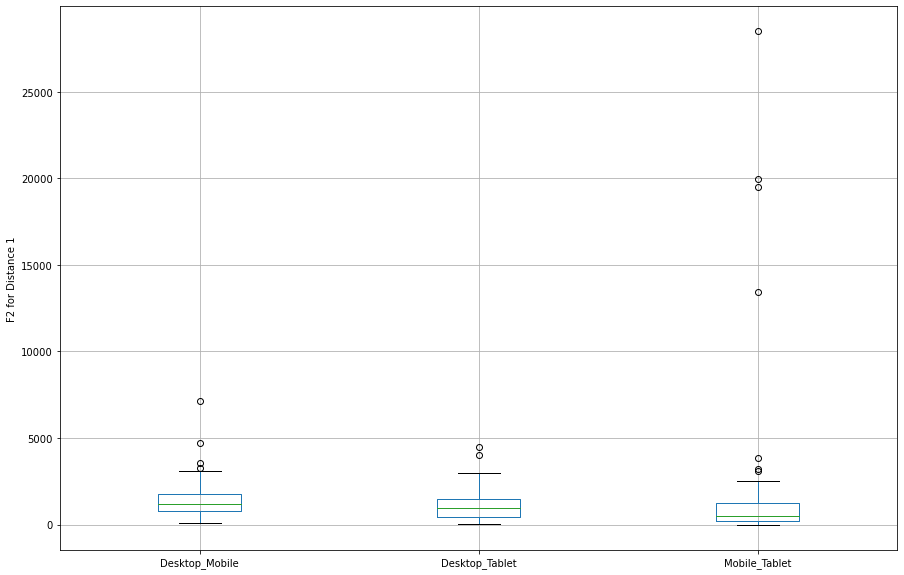

In [188]:
fig,ax = plt.subplots(figsize = (15,10))
KL_divergence_mated_f2.boxplot(column=['Desktop_Mobile','Desktop_Tablet', 'Mobile_Tablet'])
plt.ylabel('F2 for Distance 1')
plt.show()

In [178]:
KL_divergence_mated_f2[KL_divergence_mated_f2['Mobile_Tablet']==max(KL_divergence_mated_f2['Mobile_Tablet'])]

,User,Desktop_Mobile,Desktop_Tablet,Mobile_Tablet
17,114,2147.201486,2359.59558,28501.489649


In [168]:
User1 = []
User2 = []
D_D_f2 = []
M_M_f2 = []
T_T_f2 = []
M_T_f2 = []
for row_id1 in range(0, len(df_final)):
    U1 = df_final.iloc[row_id1,0]
    
    for row_id2 in range (0, len(df_final)):
        U2 = df_final.iloc[row_id2,0]
        if U1 != U2:
            DD = kl_divergence(df_final.iloc[row_id,2], df_final.iloc[row_id2,2])
            MM = kl_divergence(df_final.iloc[row_id,6], df_final.iloc[row_id2,6])
            TT = kl_divergence(df_final.iloc[row_id,10], df_final.iloc[row_id2,10])
            MT = kl_divergence(df_final.iloc[row_id,6], df_final.iloc[row_id2,10])
    
            User1.append(U1)
            User2.append(U2)
            D_D_f2.append(DD)
            M_M_f2.append(MM)
            T_T_f2.append(TT)
            M_T_f2.append(MT)
    
KL_divergence_nonmated_f2 = pd.DataFrame(list(zip(User1, User2, D_D_f2, M_M_f2, T_T_f2,M_T_f2)),columns=['User1','User2','Desktop_Desktop','Mobile_Mobile','Tablet_Tablet','Mobile_Tablet'])


In [169]:
KL_divergence_nonmated_f2

,User1,User2,Desktop_Desktop,Mobile_Mobile,Tablet_Tablet,Mobile_Tablet
0,1,10,632.844282,1115.986106,1595.282924,1171.167836
1,1,100,622.091615,926.543835,3189.697353,3651.685536
2,1,101,430.422942,354.263659,202.110088,488.032180
3,1,102,757.223408,352.246591,431.609891,656.963480
4,1,103,405.970334,358.574955,2130.140171,1254.314910
...,...,...,...,...,...,...
13105,99,94,1247.914391,2166.816166,572.251859,339.641677
13106,99,95,564.756773,739.256226,191.657976,703.634310
13107,99,96,365.481716,1722.261875,951.312763,876.838123
13108,99,97,62.230276,1897.671853,414.933191,132.689543


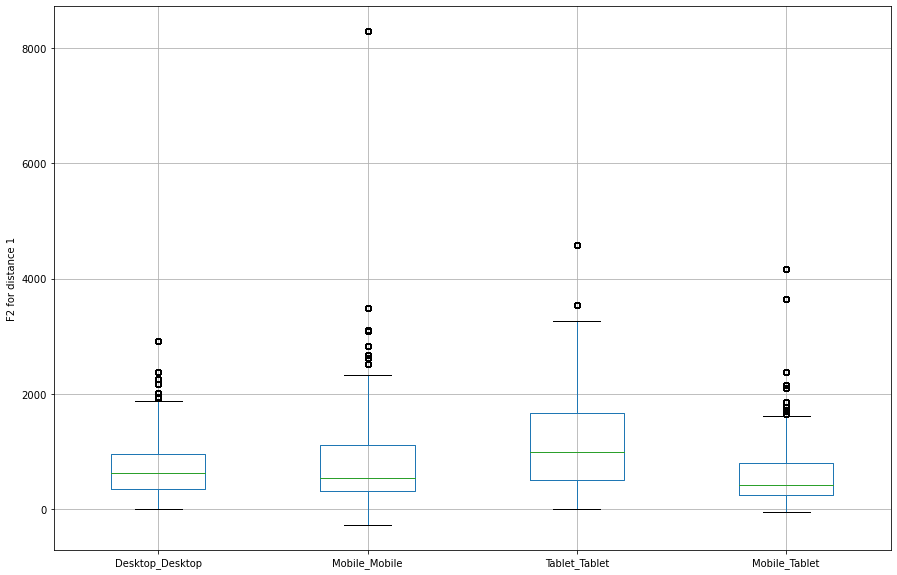

In [189]:
fig,ax = plt.subplots(figsize = (15,10))
KL_divergence_nonmated_f2.boxplot(column=['Desktop_Desktop','Mobile_Mobile', 'Tablet_Tablet','Mobile_Tablet'])
plt.ylabel('F2 for distance 1')
plt.show()

# F3

In [153]:
User = []
D_M_f3 = []
D_T_f3 = []
M_T_f3= []
for row_id in range(0, len(df_final)):
    U = df_final.iloc[row_id,0]
    DM = kl_divergence(df_final.iloc[row_id,3], df_final.iloc[row_id,7])
    DT = kl_divergence(df_final.iloc[row_id,3], df_final.iloc[row_id,11])
    MT = kl_divergence(df_final.iloc[row_id,7], df_final.iloc[row_id,11])
    
    User.append(U)
    D_M_f3.append(DM)
    D_T_f3.append(DT)
    M_T_f3.append(MT)
    
KL_divergence_mated_f3 = pd.DataFrame(list(zip(User, D_M_f3, D_T_f3, M_T_f3)),columns=['User','Desktop_Mobile','Desktop_Tablet','Mobile_Tablet'])


In [154]:
KL_divergence_mated_f3

,User,Desktop_Mobile,Desktop_Tablet,Mobile_Tablet
0,1,964.560520,2262.755129,981.527619
1,10,2066.860816,3852.363330,279.241189
2,100,1539.020393,2138.892756,1690.477159
3,101,1715.714990,1843.121879,174.789636
4,102,877.734679,665.453949,29.276254
...,...,...,...,...
110,95,2056.262562,1247.503711,390.349753
111,96,2633.225495,1334.436987,692.355861
112,97,5016.432440,2787.850881,276.808606
113,98,891.421166,923.625031,13.484710


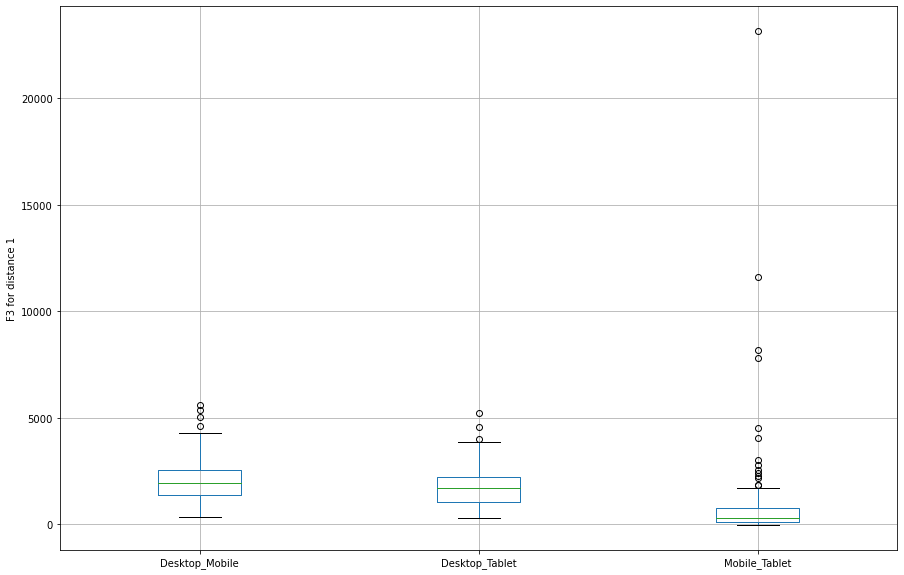

In [191]:
fig,ax = plt.subplots(figsize = (15,10))
KL_divergence_mated_f3.boxplot(column=['Desktop_Mobile','Desktop_Tablet', 'Mobile_Tablet'])
plt.ylabel('F3 for distance 1')
plt.show()

In [179]:
KL_divergence_mated_f3[KL_divergence_mated_f3['Mobile_Tablet']==max(KL_divergence_mated_f3['Mobile_Tablet'])]

,User,Desktop_Mobile,Desktop_Tablet,Mobile_Tablet
17,114,2203.193716,2362.849089,23143.117892


In [171]:
User1 = []
User2 = []
D_D_f3 = []
M_M_f3 = []
T_T_f3 = []
M_T_f3 = []
for row_id1 in range(0, len(df_final)):
    U1 = df_final.iloc[row_id1,0]
    
    for row_id2 in range (0, len(df_final)):
        U2 = df_final.iloc[row_id2,0]
        if U1 != U2:
            DD = kl_divergence(df_final.iloc[row_id,2], df_final.iloc[row_id2,2])
            MM = kl_divergence(df_final.iloc[row_id,6], df_final.iloc[row_id2,6])
            TT = kl_divergence(df_final.iloc[row_id,10], df_final.iloc[row_id2,10])
            MT = kl_divergence(df_final.iloc[row_id,6], df_final.iloc[row_id2,10])
    
            User1.append(U1)
            User2.append(U2)
            D_D_f3.append(DD)
            M_M_f3.append(MM)
            T_T_f3.append(TT)
            M_T_f3.append(MT)
    
KL_divergence_nonmated_f3 = pd.DataFrame(list(zip(User1, User2, D_D_f3, M_M_f3, T_T_f3,M_T_f3)),columns=['User1','User2','Desktop_Desktop','Mobile_Mobile','Tablet_Tablet','Mobile_Tablet'])


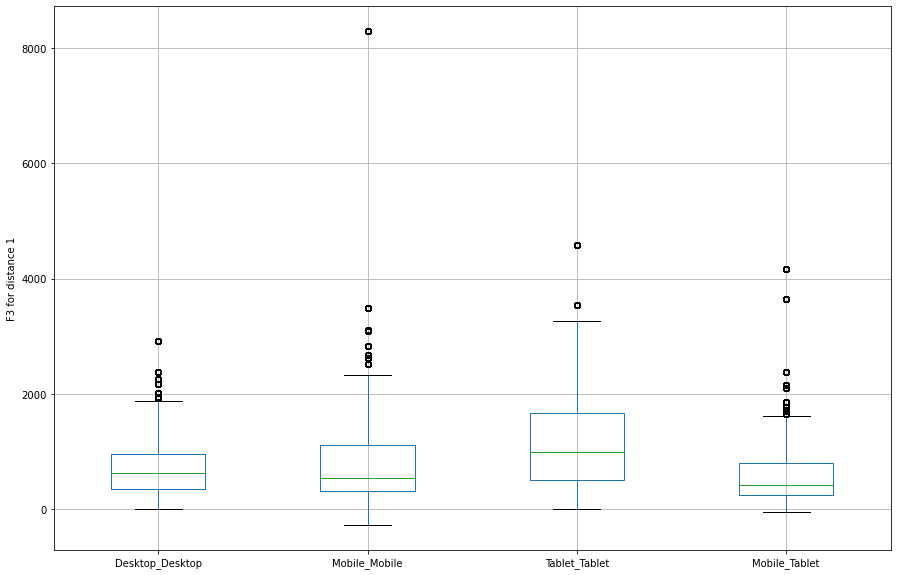

In [192]:
fig,ax = plt.subplots(figsize = (15,10))
KL_divergence_nonmated_f3.boxplot(column=['Desktop_Desktop','Mobile_Mobile', 'Tablet_Tablet','Mobile_Tablet'])
plt.ylabel('F3 for distance 1')
plt.show()

# F4

In [155]:
User = []
D_M_f4 = []
D_T_f4 = []
M_T_f4= []
for row_id in range(0, len(df_final)):
    U = df_final.iloc[row_id,0]
    DM = kl_divergence(df_final.iloc[row_id,3], df_final.iloc[row_id,7])
    DT = kl_divergence(df_final.iloc[row_id,3], df_final.iloc[row_id,11])
    MT = kl_divergence(df_final.iloc[row_id,7], df_final.iloc[row_id,11])
    
    User.append(U)
    D_M_f4.append(DM)
    D_T_f4.append(DT)
    M_T_f4.append(MT)
    
KL_divergence_mated_f4 = pd.DataFrame(list(zip(User, D_M_f4, D_T_f4, M_T_f4)),columns=['User','Desktop_Mobile','Desktop_Tablet','Mobile_Tablet'])


In [156]:
KL_divergence_mated_f4

,User,Desktop_Mobile,Desktop_Tablet,Mobile_Tablet
0,1,964.560520,2262.755129,981.527619
1,10,2066.860816,3852.363330,279.241189
2,100,1539.020393,2138.892756,1690.477159
3,101,1715.714990,1843.121879,174.789636
4,102,877.734679,665.453949,29.276254
...,...,...,...,...
110,95,2056.262562,1247.503711,390.349753
111,96,2633.225495,1334.436987,692.355861
112,97,5016.432440,2787.850881,276.808606
113,98,891.421166,923.625031,13.484710


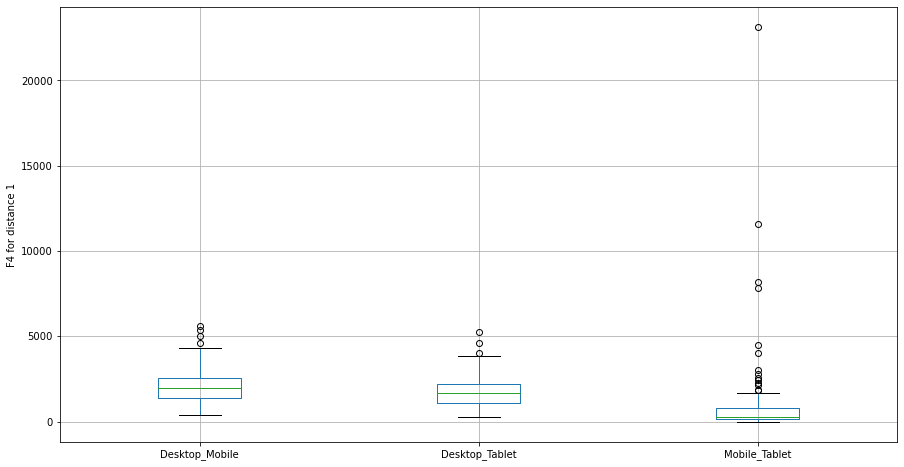

In [193]:
fig,ax = plt.subplots(figsize = (15,8))
KL_divergence_mated_f4.boxplot(column=['Desktop_Mobile','Desktop_Tablet', 'Mobile_Tablet'])
plt.ylabel('F4 for distance 1')
plt.show()

In [181]:
KL_divergence_mated_f4[KL_divergence_mated_f4['Mobile_Tablet']==max(KL_divergence_mated_f4['Mobile_Tablet'])]

,User,Desktop_Mobile,Desktop_Tablet,Mobile_Tablet
17,114,2203.193716,2362.849089,23143.117892


In [173]:
User1 = []
User2 = []
D_D_f4 = []
M_M_f4 = []
T_T_f4 = []
M_T_f4 = []
for row_id1 in range(0, len(df_final)):
    U1 = df_final.iloc[row_id1,0]
    
    for row_id2 in range (0, len(df_final)):
        U2 = df_final.iloc[row_id2,0]
        if U1 != U2:
            DD = kl_divergence(df_final.iloc[row_id,3], df_final.iloc[row_id2,3])
            MM = kl_divergence(df_final.iloc[row_id,7], df_final.iloc[row_id2,7])
            TT = kl_divergence(df_final.iloc[row_id,11], df_final.iloc[row_id2,11])
            MT = kl_divergence(df_final.iloc[row_id,7], df_final.iloc[row_id2,11])
    
            User1.append(U1)
            User2.append(U2)
            D_D_f4.append(DD)
            M_M_f4.append(MM)
            T_T_f4.append(TT)
            M_T_f4.append(MT)
    
KL_divergence_nonmated_f4 = pd.DataFrame(list(zip(User1, User2, D_D_f4, M_M_f4, T_T_f4,M_T_f4)),columns=['User1','User2','Desktop_Desktop','Mobile_Mobile','Tablet_Tablet','Mobile_Tablet'])


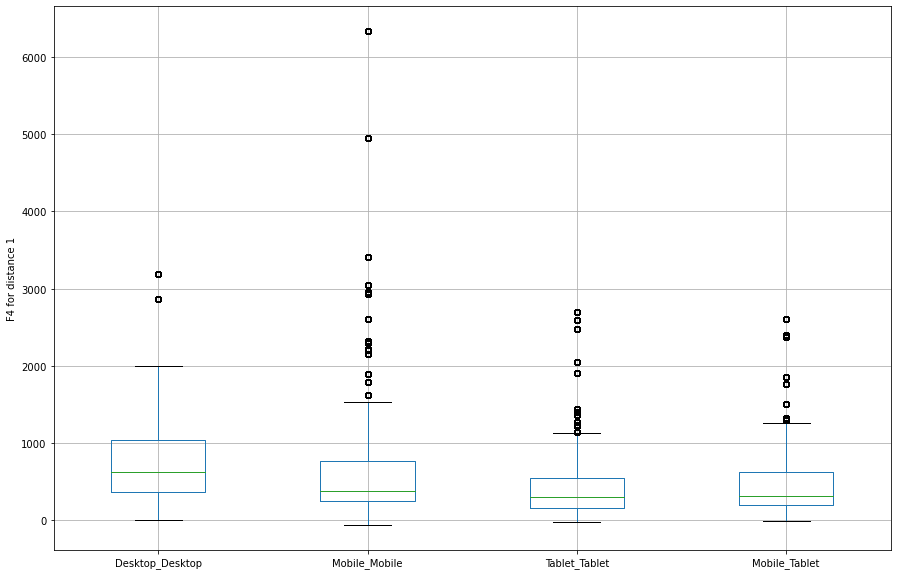

In [194]:
fig,ax = plt.subplots(figsize = (15,10))
KL_divergence_nonmated_f4.boxplot(column=['Desktop_Desktop','Mobile_Mobile', 'Tablet_Tablet','Mobile_Tablet'])
plt.ylabel('F4 for distance 1')
plt.show()

In [138]:
User1 = []
User2 = []
D_D = []
M_M = []
T_T = []
M_T = []
for row_id1 in range(0, len(df_final)):
    U1 = df_final.iloc[row_id1,0]
    
    for row_id2 in range (0, len(df_final)):
        U2 = df_final.iloc[row_id2,0]
        if U1 != U2:
            DD = kl_divergence(df_final.iloc[row_id,1], df_final.iloc[row_id2,1])
            MM = kl_divergence(df_final.iloc[row_id,2], df_final.iloc[row_id2,2])
            TT = kl_divergence(df_final.iloc[row_id,3], df_final.iloc[row_id2,3])
            MT = kl_divergence(df_final.iloc[row_id,2], df_final.iloc[row_id2,3])
    
            User1.append(U1)
            User2.append(U2)
            D_D.append(DD)
            M_M.append(MM)
            T_T.append(TT)
            M_T.append(MT)
    
KL_divergence_nonmated = pd.DataFrame(list(zip(User1, User2, D_D, M_M, T_T,M_T)),columns=['User1','User2','Desktop_Desktop','Mobile_Mobile','Tablet_Tablet','Mobile_Tablet'])


In [139]:
KL_divergence_nonmated

,User1,User2,Desktop_Desktop,Mobile_Mobile,Tablet_Tablet,Mobile_Tablet
0,1,10,1096.122350,1001.951940,1988.030862,1350.010918
1,1,100,1307.086144,2219.915838,2284.470352,959.947012
2,1,101,281.535718,479.097539,610.853184,412.117719
3,1,102,1413.392534,739.200986,121.629467,9.874811
4,1,103,722.540784,1830.155203,552.217545,252.122336
...,...,...,...,...,...,...
13105,99,94,2109.531247,2308.588618,504.040892,340.741646
13106,99,95,1139.634548,968.675412,75.137477,10.295173
13107,99,96,363.517721,1909.450939,1095.721606,219.042720
13108,99,97,88.141998,2910.352706,1228.403742,49.534934


In [107]:
User_1 = KL_divergence_nonmated[KL_divergence_nonmated['User1']==1]
User_1_mated = KL_divergence_mated[KL_divergence_mated['User']==1]

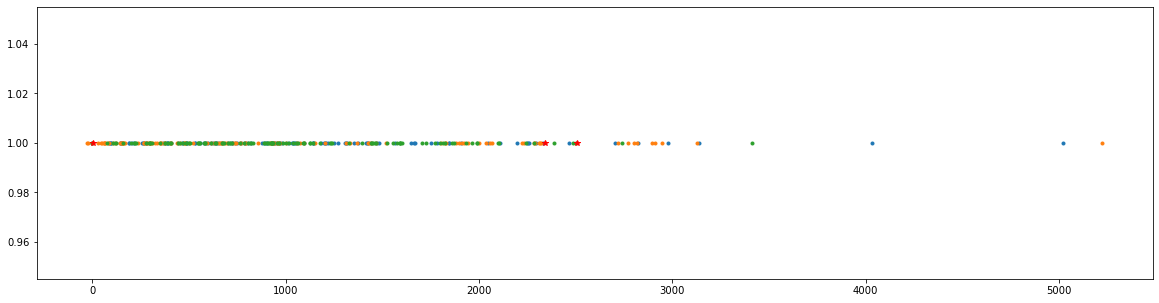

In [108]:
fig,ax = plt.subplots(figsize = (20,5))
y1 = User_1['User1']
y2 = User_1_mated['User']
x1 = User_1['Desktop_Desktop']
x2 = User_1['Mobile_Mobile']
x3 = User_1['Tablet_Tablet']
m1 = User_1_mated['Desktop_Mobile']
m2 = User_1_mated['Desktop_Tablet']
m3 = User_1_mated['Mobile_Tablet']
plt.plot(x1,y1,'.',x2,y1,'.',x3,y1,'.')
plt.plot(m1,y2,'r*',m2,y2,'r*',m3,y2,'r*')
plt.show()

In [126]:
matted_sample= KL_divergence_mated.sample(frac=0.2)

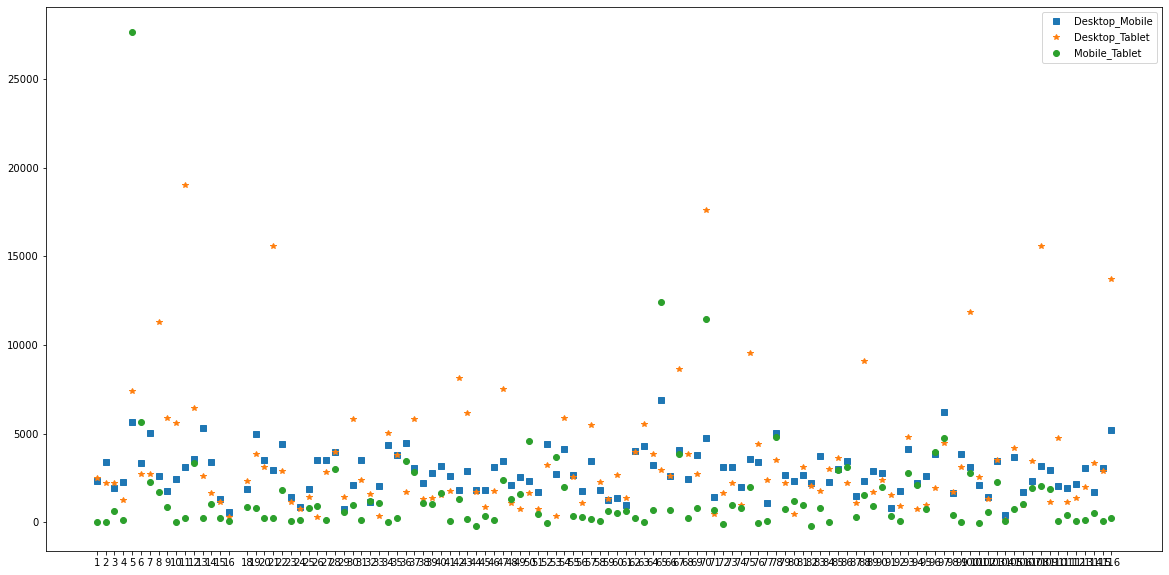

In [130]:
fig,ax = plt.subplots(figsize = (20,10))
x = KL_divergence_mated['User']
y1 = KL_divergence_mated['Desktop_Mobile']
y2 = KL_divergence_mated['Desktop_Tablet']
y3 = KL_divergence_mated['Mobile_Tablet']
plt.plot(x,y1,'s', x,y2,'*',x,y3,'o')
plt.xticks(x)
plt.legend(['Desktop_Mobile','Desktop_Tablet','Mobile_Tablet'])
plt.show()

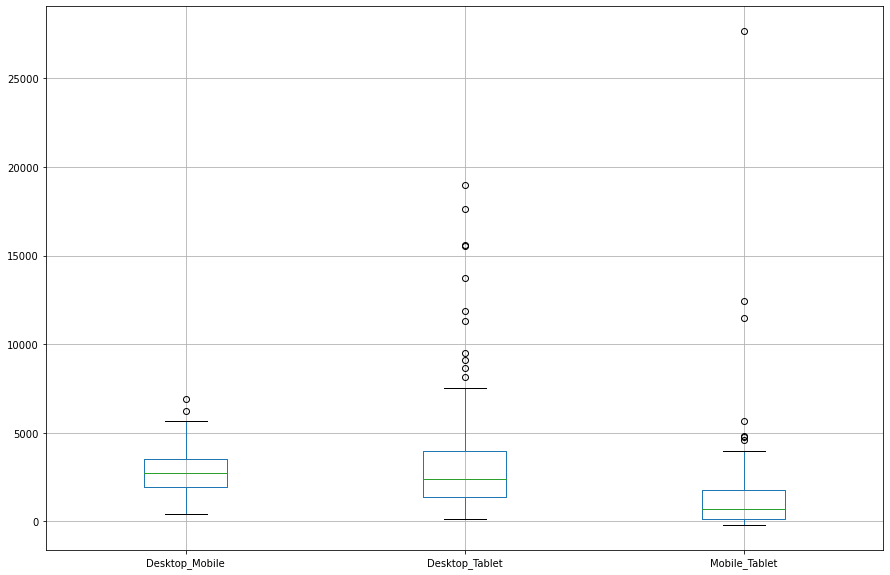

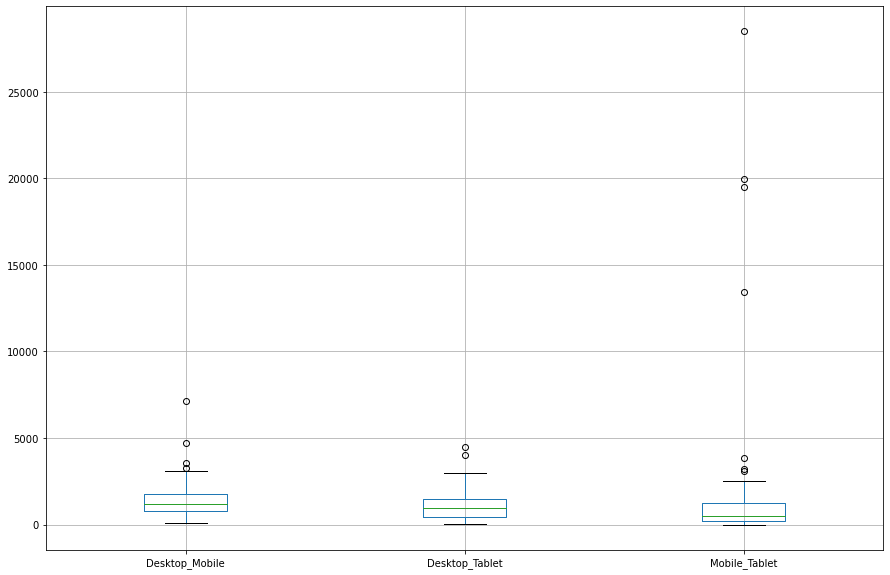

In [146]:
fig,ax = plt.subplots(figsize = (15,10))
KL_divergence_mated_f2.boxplot(column=['Desktop_Mobile','Desktop_Tablet', 'Mobile_Tablet'])
plt.show()

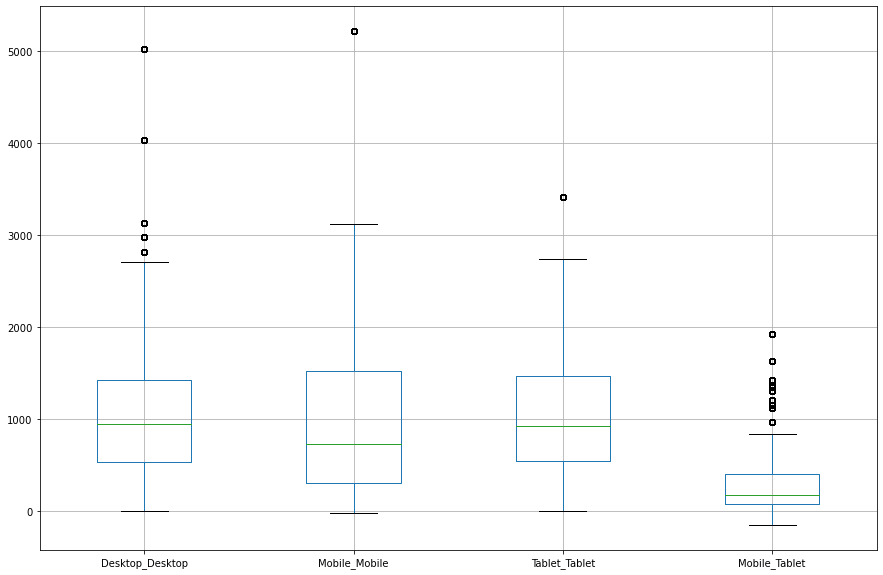

In [141]:
fig,ax = plt.subplots(figsize = (15,10))
KL_divergence_nonmated.boxplot(column=['Desktop_Desktop','Mobile_Mobile', 'Tablet_Tablet','Mobile_Tablet'])
plt.show()